In [13]:
from matplotlib.pyplot import *
from mpl_toolkits import mplot3d
from numpy import *
from random import *

In [16]:
%matplotlib inline

In [3]:

from numpy.lib import stride_tricks

In [4]:
#Smooth Step function
def S(x):
    return 3*x*x-2*x*x*x

#Pseudo-random numbers
def a(i,j):
    u,v=50*(i/pi-floor(i/pi)),50*(j/pi-floor(j/pi))
    return 2*(u*v*(u+v)-floor(u*v*(u+v)))-1

#Conditions de raccordement
def b(i,j): return a(i+1,j)
def c(i,j): return a(i,j+1)
def d(i,j): return a(i+1,j+1)

#Noise local
def N(x,y):
    i,j=floor(x),floor(y)
    return a(i,j)+(b(i,j)-a(i,j))*S(x-i)+(c(i,j)-a(i,j))*S(y-j)+(a(i,j)-b(i,j)-c(i,j)+d(i,j))*S(x-i)*S(y-j)

#Génératrice du terrain
def f(x,y):
    result=0
    p=1
    for i in range(10):
        result+=N(p*x,p*y)/p
        p*=2
        temp=x
        x=3/5*x-4/5*y
        y=4/5*temp+3/5*y
    return result

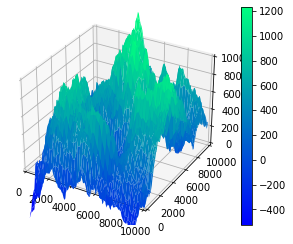

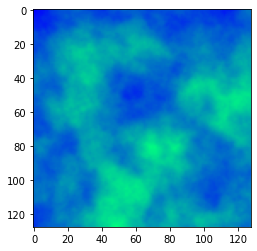

78.125


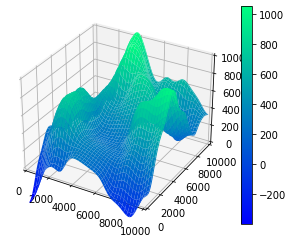

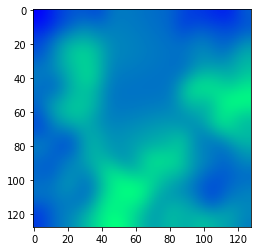

In [10]:
n=128
Map=zeros((n,n))


    
def laplacien_global(grid,delta=1):
    """Global laplacien grid of a 2D grid; delta is the unit distance between two cells"""
    n,m=grid.shape
    #growing the grid to give neighbors to border points
    rgrid=np.zeros((n+2,m+2))
    #the base grid is set at the center of the new grid
    rgrid[1:-1,1:-1]=grid
    #setting the artificial border value to the real border points
    #this will mean they will not influence the border points (average between x and x is still x)
    #this way the Laplacian's average value will remain 0
    rgrid[1:-1,-1]=grid[:,-1]
    rgrid[1:-1,0]=grid[:,0]
    rgrid[-1,1:-1]=grid[-1,:]
    rgrid[0,1:-1]=grid[0,:]
    #the edges are kept to 0, they don't have useful neighbours
    
    #striding
    #the n,m array is changed into a n,m,3,3 array, each cell is replaced by a 3x3 grid containing the cell
    #and its 8 neighbours
    shape = (n, m, 3, 3)
    patches = stride_tricks.as_strided(rgrid, shape=shape, strides=(2 * rgrid.strides))
    filtre=((1/delta)**2)*np.array([[0,1,0],[1,-4,1],[0,1,0]])
    result=np.sum(patches*filtre,axis=(-1,-2))
    return result
            
            
            
#une fonction qui va diffuser des grains du terrain pour aplatir certaines régions     
def diffuse(grid,k=10,delta=1,t=1):
    for i in range(k):
        D=10
        dt=t/(n)
        grid+=dt*D*laplacien_global(grid,delta)
    return grid

#La fonction qui affiche en 3D le terrain                
def display3d():
    navigate=1000
    
    x=linspace(0,10*navigate,n)
    y=linspace(0,10*navigate,n)
    X, Y = meshgrid(x, y)
    z=600*f(X/2000,Y/2000)+600
    show3d(z,navigate)
    figure()
    imshow(z,cmap="winter")
    show()
    print(10*navigate/n)
    n1,m=z.shape
    z[0:int(2*n1/3),int(m/3):int(2*m/3)]=diffuse(z[0:int(2*n1/3),int(m/3):int(2*m/3)],k=1000,delta=10*navigate/n,t=10000)
    z=diffuse(z,k=1000,delta=10*navigate/n,t=1000)
    show3d(z,navigate)
    figure()
    imshow(z,cmap="winter")
    show()

#Pour afficher le terrain en 2D    
def display2d():
    imshow(Map)
    colorbar()
    show()

%timeit
display3d()
close()

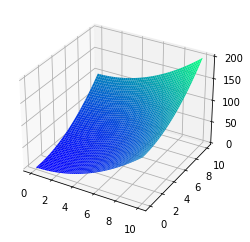

4.0160481283207226


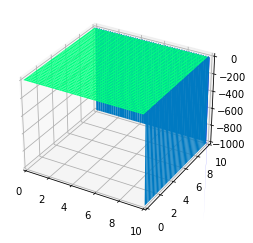

In [7]:
def g(x,y):
    return (x**2+y**2)

x=np.linspace(0,10,num=500)
y=np.linspace(0,10,num=500)
X,Y=meshgrid(x,y)
z=g(X,Y)
fig = figure()
ax = axes(projection ='3d')
p=ax.plot_surface(X, Y, z, cmap ='winter')
show()

#X,Y=meshgrid(x[1:-1],y[1:-1])
fig = figure()
ax = axes(projection ='3d')
ax.set_xlim3d(0,10)
ax.set_ylim3d(0,10)
ax.set_zlim3d(-1000,10)
print(np.mean(laplacien_global(z,delta=1/50)[1:-1,1:-1]))
p=ax.plot_surface(X, Y, laplacien_global(z,delta=1/50), cmap ='winter')
show()

In [112]:
%matplotlib inline

In [65]:
print(laplacien_global(test)[48,21])
Map=test
print(Laplacien(48,21))

0.33129098072459284
0.33129098072459284


In [9]:
def show3d(map2,navigate=15):
    x=linspace(0,10*navigate,n)
    y=linspace(0,10*navigate,n)
    X, Y = meshgrid(x, y)
    fig = figure()
    ax = axes(projection ='3d')
    ax.set_xlim3d(0,10*navigate)
    ax.set_ylim3d(0,10*navigate)
    ax.set_zlim3d(0,navigate)
    p=ax.plot_surface(X, Y, map2, cmap ='winter')
    fig.colorbar(p)
    show()

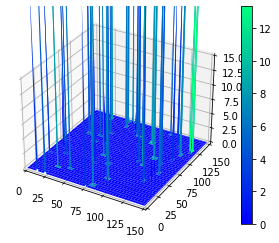

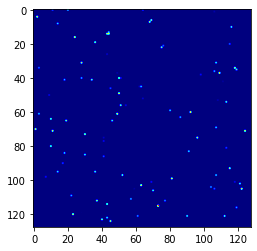

In [395]:
map2=np.zeros((n,n))
for i in range(100):
    map2[randint(0,n-1)][randint(0,n-1)]+=100*random()


show3d(map2)
figure()
imshow(map2,cmap=cm.jet)

In [470]:
map2=np.zeros((n,n))
for i in range(300):
    map2[randint(0,n-1)][randint(0,n-1)]+=500*random()

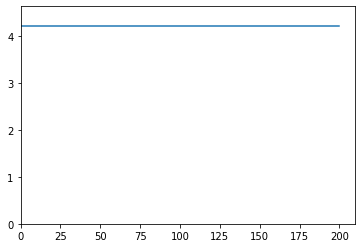

In [368]:
map2=np.zeros((n,n))
for i in range(300):
    map2[randint(0,n-1)][randint(0,n-1)]+=500*random()

s0=np.mean(map2)
s=[s0]
for i in range(200):
    map2=diffuse(map2,10)
    s.append(np.mean(map2))
xlim(0,210)
ylim(0,1.1*np.max(s))
plot(s)

In [280]:
print(s[-1]/s[0])

1.0


In [397]:
print(np.mean(map2))


4.593072679373653


In [ ]:
map2+=0.1*laplacien_global(map2)
print(np.mean(map2))

In [469]:

print(np.mean(laplacien_global(map2)))

-6.938893903907228e-18


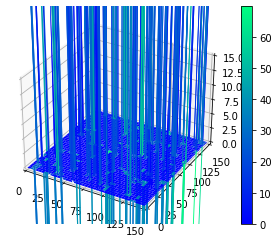

In [457]:
show3d(map2)

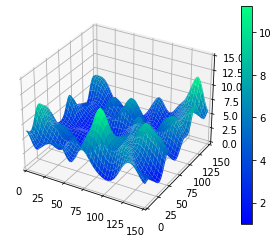

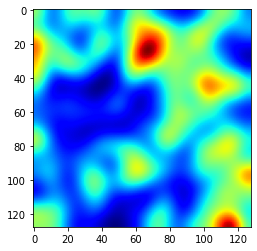

In [473]:

map2=diffuse(map2,100)
show3d(map2)
figure()
imshow(map2,cmap=cm.jet)

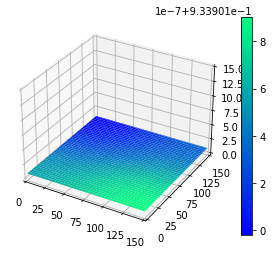

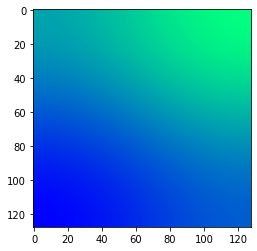

In [450]:

map2=diffuse(map2,10000)
show3d(map2)
figure()
imshow(map2,cmap=cm.winter)

In [451]:
(np.sum(laplacien_global(map2)**2))**(1/2)

1.8473946354114925e-08

In [14]:
from PIL import Image

# Open image
im = Image.open('data.tif')

# Make into Numpy array
na = array(im)

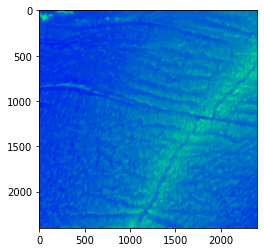

In [30]:
imshow(na,cmap='winter')

In [27]:
np.max(na)

-820

In [1]:
na2=diffuse(np.float32(na),15,t=5)

NameError: name 'diffuse' is not defined

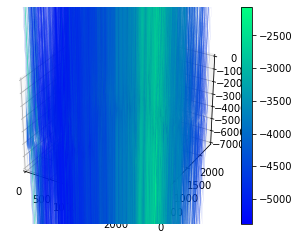

In [46]:
x=linspace(0,2400,2400)
y=linspace(0,2400,2400)
X, Y = meshgrid(x, y)
fig = figure()
ax = axes(projection ='3d')
ax.set_xlim3d(0,2400)
ax.set_ylim3d(0,2400)
ax.set_zlim3d(-7000,0)
p=ax.plot_surface(X, Y, na2, cmap ='winter')
fig.colorbar(p)
show()